# Domestic and Worldwide Revenue Since 1988

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Data/tn.movie_budgets.csv.gz')

## Cleaning

In [2]:
# remove dollar signs
df.production_budget = df.production_budget.replace('\$','', regex = True)
df.domestic_gross = df.domestic_gross.replace('\$','', regex = True)
df.worldwide_gross = df.worldwide_gross.replace('\$','', regex = True)

# remove commas
df.production_budget = df.production_budget.replace('\,','', regex = True)
df.domestic_gross = df.domestic_gross.replace('\,','', regex = True)
df.worldwide_gross = df.worldwide_gross.replace('\,','', regex = True)

df.worldwide_gross = df.worldwide_gross.astype('int')
df.domestic_gross = df.domestic_gross.astype('int')
df.production_budget = df.production_budget.astype('int')

df['release_date'] =  pd.to_datetime(df['release_date'], infer_datetime_format=True)
df = df[(df['release_date'].dt.year >= 1988)]

# drop movie title because it's not relevant to this analysis
df = df.drop(['movie'], axis=1)

# some rows had an impossible value (0) so I dropped those
df = df[(df != 0).all(1)]

df['release_date'] = pd.to_datetime(df.release_date, format='%y', errors='coerce').dt.year
df.sort_values(by='release_date')

# group years into one row each
df = df.groupby('release_date').sum().reset_index()

## Plotting

Text(0.5, 1.0, 'World Gross Revenue Per Year')

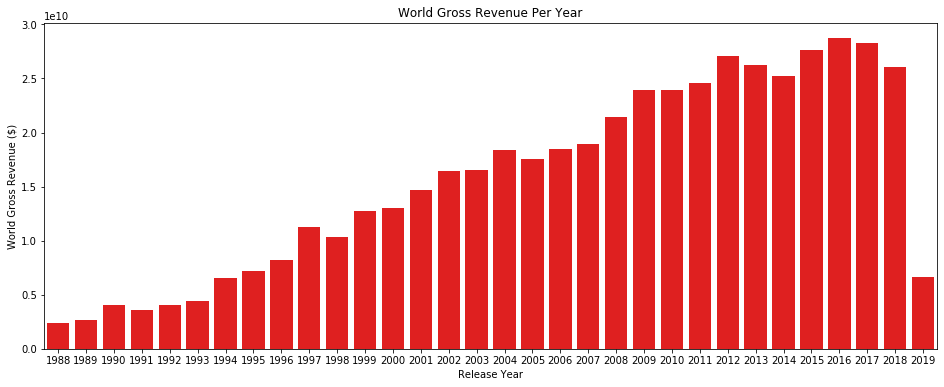

In [3]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="release_date", y="worldwide_gross", data=df, color="r")
plt.xlabel('Release Year')
plt.ylabel('World Gross Revenue ($)') # highest value is $14,000,000,000
plt.title('World Gross Revenue Per Year')
#ax.set_xticks

(0.0, 30000000000)

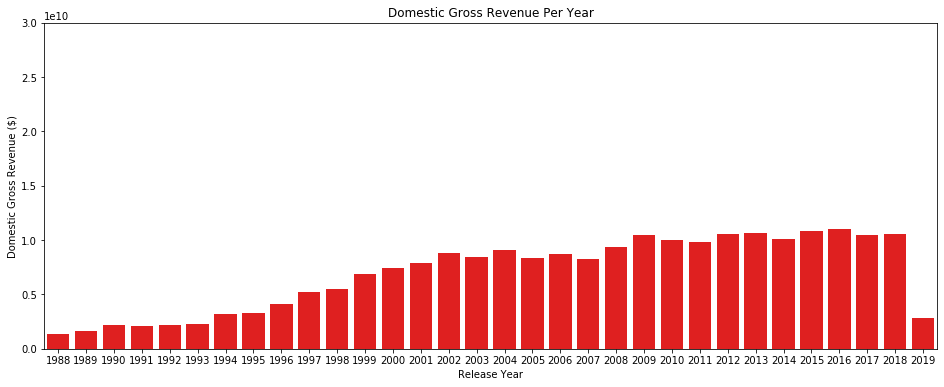

In [4]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="release_date", y="domestic_gross", data=df, color="r")
plt.xlabel('Release Year')
plt.ylabel('Domestic Gross Revenue ($)')
plt.title('Domestic Gross Revenue Per Year')
plt.ylim(top=30000000000)

## To Do:

- remove 2019!!!
- add a trend line?

## Reccomendation: 
### Over the last 30 years, movies have increasingly generate more revenue both domestically and worldwide. However, since worldwide growth is faster, we reccomend not neglecting foreign market releases.  

## Improvements for this analysis: find regression of each graph